<a href="https://colab.research.google.com/github/bmosk54/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import tensorflow as tf # ML framework
from tensorflow import keras # Wrapper to make tensorflow easier to work with
import numpy as np # Linear algebra
import matplotlib.pyplot as plt # Plotting
import pandas as pd # Reading files
plt.rcParams['figure.figsize'] = (10,10) # Set figure parameters

In [ ]:
from keras.datasets import mnist #mnist database of handwritten digits
from keras.models import Sequential # import model we will use from keras
from keras.layers import Dense, Dropout, Activation # NN functions
from keras.utils import np_utils # Utilities

Using TensorFlow backend.


In [ ]:
nb_classes = 10 # Define number of classes we will have
# Load the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


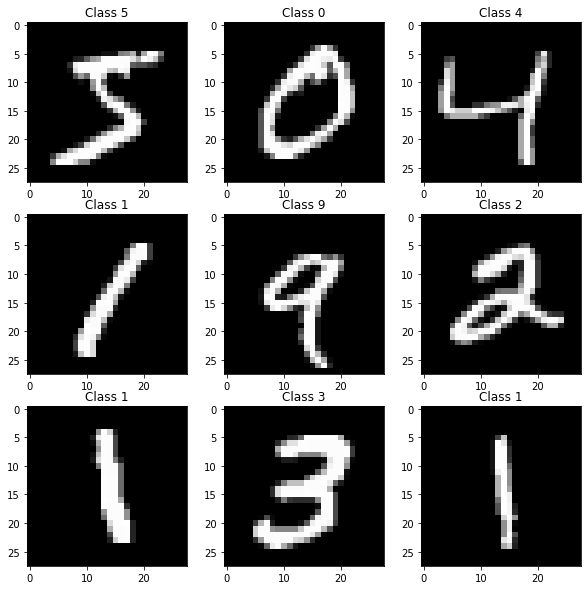

In [ ]:
# Display the first 9 digits with their labels
for i in range(9):
 plt.subplot(3,3,i+1) # Arrange the 9 plots
 plt.imshow(X_train[i], cmap='gray', interpolation='none') # Convert image to grayscale
 plt.title("Class {}".format(y_train[i]))

In [ ]:
# Reshape the data and set data type
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Get x values to be between 0 and 1 (easier to train the network like that)
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
# Make the y values into categorical data (since it defines the class)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential() # Use a sequential model to model our data
model.add(Dense(512, input_shape=(784,))) # Add a hidden layer with 512 nodes
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to
 # of the layer above. Here, with a "rectified linear unit"
# we clamp all values below 0 to 1.
# Add 2 more layers and set dropouts
model.add(Dropout(0.2)) # Dropout helps protect the model from memorizing or "overfitting"
model.add(Dense(512))

model.add(Activation('relu'))
model.add(Dropout(0.2))
# Make last layer be only 10 nodes (probably correct to put in nb_classes instead of a hard-coded 10)
model.add(Dense(10))
# Use softmax function to retrieve predicted probabilities for each class
model.add(Activation('softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# Set the model to use a loss function of categorical cross-entropy and the adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# Fit our trainign data to the model using 128 images per iteration and going through the dataset 4 times 
model.fit(X_train, Y_train,
 batch_size=128, epochs=4,
 verbose=1,
 validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/4





60000/60000 [==============================] - 11s 181us/step - loss: 0.2516 - val_loss: 0.0949
Epoch 2/4
60000/60000 [==============================] - 10s 166us/step - loss: 0.1021 - val_loss: 0.0763
Epoch 3/4
60000/60000 [==============================] - 10s 165us/step - loss: 0.0737 - val_loss: 0.0654
Epoch 4/4
60000/60000 [==============================] - 10s 166us/step - loss: 0.0570 - val_loss: 0.0669


In [ ]:
# Sees how well our model did
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 71us/step


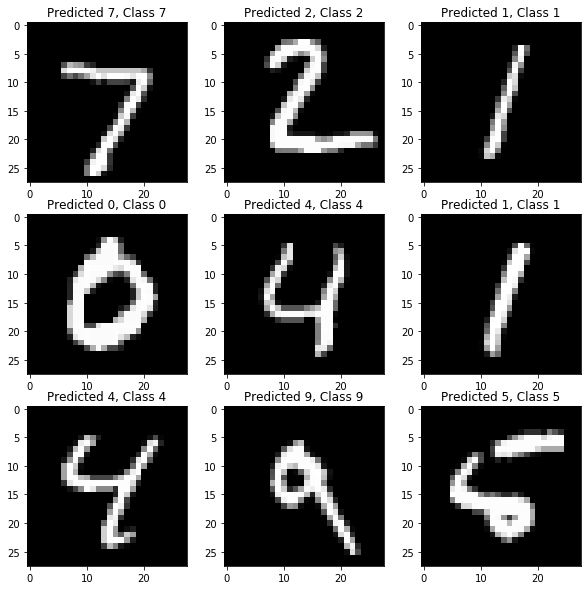

In [ ]:
# Predict values for test dataset
predicted_classes = model.predict_classes(X_test)
# Define which ones it got right and wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
# Plot examples that it got right
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

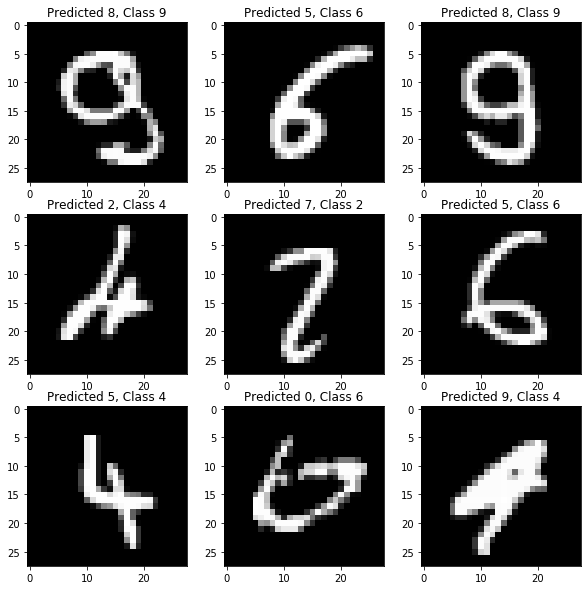

In [ ]:
# Plot examples it got wrong
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
 plt.subplot(3,3,i+1)
 plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
 plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))